<a href="https://colab.research.google.com/github/les1smore/DATA606-Capstone-Project/blob/main/4_Lasso_Path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Draw the Lasso Path

## Define a pipeline 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline 

In [ ]:
pre_pipeline = Pipeline(steps = [
                ('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree = 2, interaction_only=False))
])

In [ ]:
# Scale and transform X
X_train_tx = pre_pipeline.fit_transform(X_train)
X_test_tx = pre_pipeline.transform(X_test)

In [ ]:
data['Have_Diabetes'].nunique()

2

In [ ]:
# Silence sklearn waning for readability
def warn (*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from sklearn.linear_model import lasso_path

In [ ]:
alphas, coefs, _, n_iter = lasso_path(X = X_train_tx, y=y_train, return_n_iter = True)

In [ ]:
coefs.shape

(595, 100)

## Plot convergence to zero

In [ ]:
import itertools

# Globally making the plots larger
plt.rcParams['figure.figsize'] = [15,11]

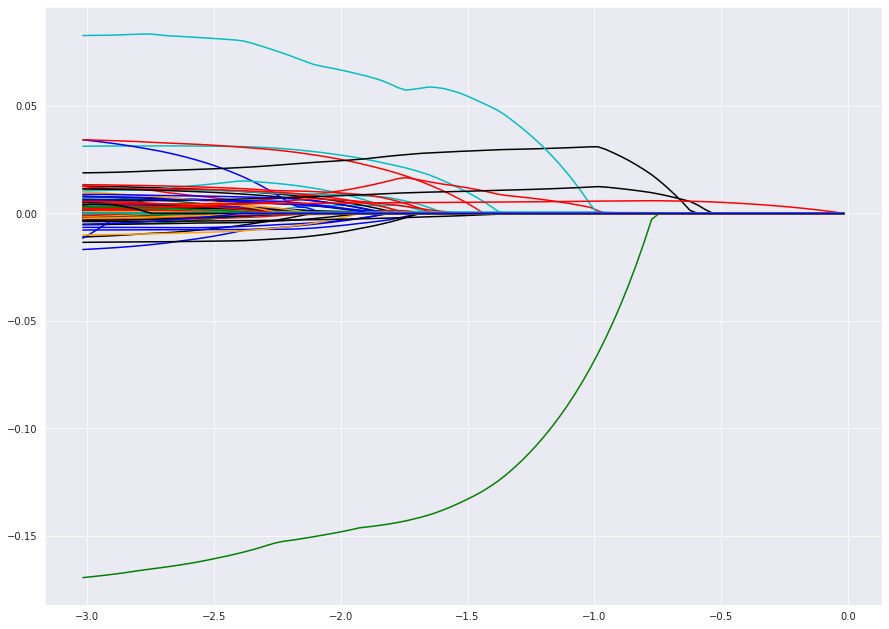

In [ ]:
plt.figure(1)
colors = itertools.cycle(['b', 'r', 'g','c','k','orange'])
log_alphas_lasso = np.log10(alphas)

for coef_l, c in zip(coefs, colors):
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c)

In [ ]:
# Try again without polynomial expansion
std_scaler = StandardScaler()

X_train_tx2 = std_scaler.fit_transform(X_train)
X_test_tx2 = std_scaler.transform(X_test)

# Get the feature names
feature_names = std_scaler.get_feature_names_out()

## Draw Lasso path for analyzing features (only standard scaling)

In [ ]:
alphas2, coefs2, _, n_iter = lasso_path(X = X_train_tx2, y=y_train, return_n_iter = True)

In [ ]:
coefs2.shape

(33, 100)

Now we have 40 rows, compared to the previous 861 rows.

### Plot convergence to zerio 

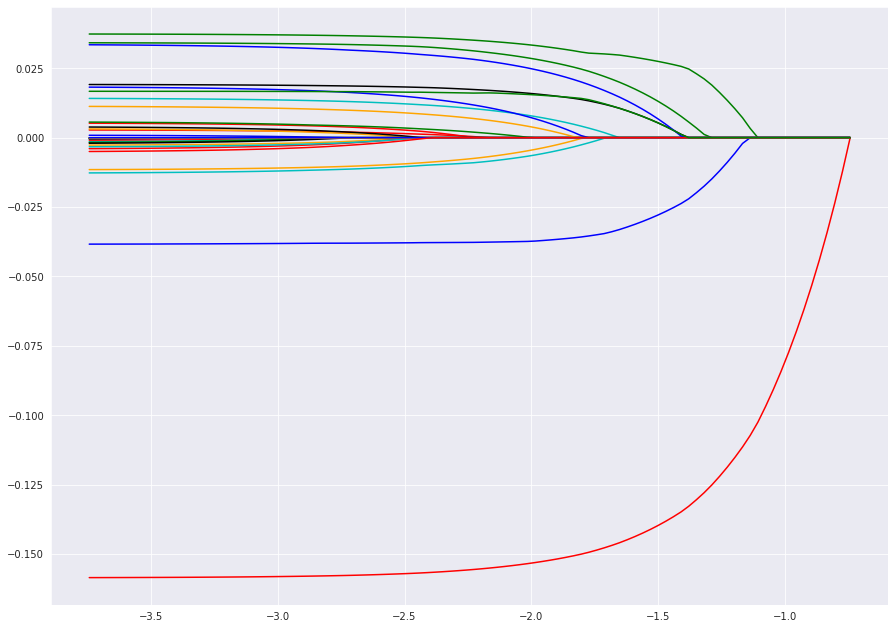

In [ ]:
plt.figure(1)
colors = itertools.cycle(['b', 'r', 'g','c','k','orange'])
log_alphas_lasso2 = np.log10(alphas2)

for coef_l, c in zip(coefs2, colors):
    l1 = plt.plot(log_alphas_lasso2, coef_l, c=c)

**Note**: The features with the most correlation to Y will remain above 0 longer. Those crashing to zero quickly did not have much correlation.

In [ ]:
coefs2_df = abs(pd.DataFrame(coefs2, columns=alphas).mean(axis=1)).sort_values()
print(coefs2_df.head(5))
print('-'*10)
print(coefs2_df.tail(5))

16    0.000000e+00
21    0.000000e+00
29    0.000000e+00
30    1.624612e-07
26    2.138247e-05
dtype: float64
----------
24    0.021163
8     0.023374
2     0.028519
0     0.029616
25    0.138897
dtype: float64


In [ ]:
# Top 5 strongest features to the target
feature_names[25], feature_names[0], feature_names[2], feature_names[8], feature_names[24]

('Taking Insulin',
 'Good Health',
 'High Blood Pressure',
 'BMI Category',
 'Pre-diabetic')

In [ ]:
# Top 5 Weakest features to the target
feature_names[16], feature_names[21], feature_names[29], feature_names[30], feature_names[26]

('High Cost of Medical',
 'Chronic Obstructive Pulmonary Disease',
 'Sleep Disordered Breathing',
 'Trouble sleeping',
 'Have Cateracts')

**Why are the strongest features more relevant?**

As the alpha values increase, the features are penalized and the lasso coefficients descent towards zero; when a coefficient reaches zero the feature is eliminated.

The features which remain non-zero longest show the most statistical relevance to ther target, due to the lasso coordinate descent.

**Why are the weakest features irrelevant?**

These are the features with the least correlation to the traning values as calculated by lasso regression.